In [0]:
import torch
import pandas as pd
import numpy as np
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt
import string 
import os
import re
%matplotlib inline

## Import GloVe Embedding as Dictionary

In [0]:
embedding_dict = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coef = np.asarray(values[1:],dtype='float32')
    embedding_dict[word] = coef
f.close()

In [0]:
def preprocess(file):
    processed = []
    lines = file.read().split('\n')
    for line in lines:
        line = line.lower()
        line = line.replace('1',' one ')
        line = line.replace('2',' two ')
        line = line.replace('3',' three ')
        line = line.replace('4',' four ')
        line = line.replace('5',' five ')
        line = line.replace('6',' six ')
        line = line.replace('7',' seven ')
        line = line.replace('8',' eight ')
        line = line.replace('9',' nine ')
        line = line.replace('0',' zero ')
        line = line.replace('#','<num>')
        line = line.replace('-', ' ')
        line = line.replace("'s'", ' ')
        line = re.sub(" . ",' point ',line)
        line = re.sub(">.<",' point ',line)
        text = re.sub(r"[^a-zA-Z?.!,'<>]+"," ",line)
        text = text.rstrip().strip()
        text = 'bos ' + text + ' eos'
        processed.append(text)
    return processed

In [0]:
pf_train_in = os.getcwd()+'/train/train.article.txt'
pf_train_sum = os.getcwd()+'/train/train.title.txt'
text_train_in = open(pf_train_in,'r')
text_train_sum = open(pf_train_sum,'r')

lines_train_in = preprocess(text_train_in)
lines_train_sum = preprocess(text_train_sum)

TRAIN = pd.DataFrame({'Input':lines_train_in,'Sum1':lines_train_sum})

In [0]:
TRAIN.head()

,Input,Sum1
0,<bos> australia 's current account deficit shr...,<bos> australian current account deficit narro...
1,<bos> at least two people were killed in point...,<bos> at least two dead in southern philippine...
2,<bos> australian shares closed down <num point...,<bos> australian stocks close down <num point ...
3,<bos> south korea 's nuclear envoy kim sook ur...,<bos> envoy urges north korea to restart nucle...
4,<bos> south korea on monday announced sweeping...,<bos> skorea announces tax cuts to stimulate e...


In [0]:
print("TRAIN has {} articles".format(TRAIN.shape[0])) 

TRAIN has 3803958 articles


In [0]:
TRAIN_in_len = []
TRAIN_sum_len = [] 

for line in lines_train_in:
    w = 0
    for word in line.split(' '):
        w += 1
    TRAIN_in_len.append(w)
    
for line in lines_train_sum:
    w = 0
    for word in line.split(' '):
        w += 1
    TRAIN_sum_len.append(w)
TRAIN_in_len = np.array(TRAIN_in_len)
TRAIN_sum_len = np.array(TRAIN_sum_len) 

In [0]:
print("\t\t Min\t 25%\t Avg\t 75%\t Max")
print("\nTRAIN Input\t {}\t{}\t{}\t{}\t{}".format(np.percentile(TRAIN_in_len,0),np.percentile(TRAIN_in_len,25),np.percentile(TRAIN_in_len,50),np.percentile(TRAIN_in_len,75),np.percentile(TRAIN_in_len,100)))
print("TRAIN Summary\t {}\t{}\t{}\t{}\t{}".format(np.percentile(TRAIN_sum_len,0),np.percentile(TRAIN_sum_len,25),np.percentile(TRAIN_sum_len,50),np.percentile(TRAIN_sum_len,75),np.percentile(TRAIN_sum_len,100)))


		 Min	 25%	 Avg	 75%	 Max

TRAIN Input	 3.0	29.0	34.0	39.0	141.0
TRAIN Summary	 3.0	9.0	10.0	12.0	76.0


In [0]:
lines_train_in = TRAIN.iloc[:,0].values
lines_train_sum = TRAIN.iloc[:,1].values

(array([1.00000e+00, 0.00000e+00, 7.00000e+00, 2.30930e+04, 3.30900e+04,
        8.08750e+04, 1.44740e+05, 2.51581e+05, 2.46434e+05, 4.77185e+05,
        5.83727e+05, 6.06062e+05, 3.47907e+05, 3.90294e+05, 2.52407e+05,
        1.55525e+05, 6.65320e+04, 6.32320e+04, 3.57770e+04, 2.03990e+04,
        8.11000e+03, 7.49800e+03, 4.08400e+03, 2.25300e+03, 9.18000e+02,
        8.57000e+02, 4.89000e+02, 3.38000e+02, 1.84000e+02, 8.80000e+01,
        9.30000e+01, 6.50000e+01, 4.40000e+01, 2.10000e+01, 2.70000e+01,
        1.60000e+01, 3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  3.  ,   5.76,   8.52,  11.28,  14.04,  16.8 ,  19.56,  22.32,
         25.08,  27.84,  30.6 ,  33.36,  36.12,  38.88,  41.64,  44.4 ,
         47.16,  49.92,  52.68,  55.44,  58.2 ,  60.96,  63.72,  66.48,
         69.24,  72.  ,  74.76,  77.52,  80.28,  83.

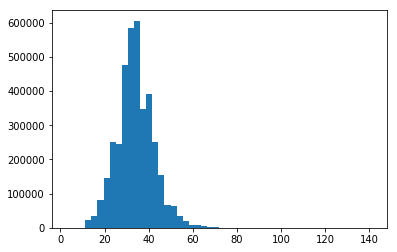

In [0]:
plt.hist(TRAIN_in_len,bins=50)

(array([2.250000e+02, 3.401000e+03, 3.939740e+05, 4.570290e+05,
        1.264969e+06, 5.713790e+05, 6.959900e+05, 1.701160e+05,
        1.675970e+05, 3.639700e+04, 3.096300e+04, 5.518000e+03,
        2.962000e+03, 2.402000e+03, 4.720000e+02, 3.750000e+02,
        7.100000e+01, 5.800000e+01, 1.500000e+01, 1.100000e+01,
        4.000000e+00, 1.300000e+01, 1.000000e+00, 3.000000e+00,
        1.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 2.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 4.000000e+00]),
 array([ 3.  ,  4.46,  5.92,  7.38,  8.84, 10.3 , 11.76, 13.22, 14.68,
        16.14, 17.6 , 19.06, 20.52, 21.98, 23.44, 24.9 , 26.36, 27.82,
        29.28, 30.74, 32.2 , 33.66, 35.12, 36.58, 38

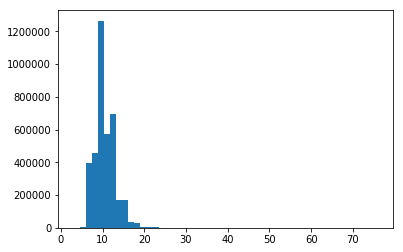

In [0]:
plt.hist(TRAIN_sum_len,bins=50)

In [0]:
a = np.where(np.logical_and(TRAIN_in_len>=20,np.logical_and(TRAIN_in_len<=50,np.logical_and(TRAIN_sum_len>=6,TRAIN_sum_len<=14))))
print(len(a[0]))

3313699


In [0]:
data_indices = np.random.randint(len(a[0]),size=1000000)
indices = a[0][data_indices]

In [0]:
data_text = lines_train_in[indices]
data_sum = lines_train_sum[indices]
output_len = TRAIN_sum_len[indices]

In [0]:
embedding_dict['pad']

array([-0.93299 , -0.14931 , -0.35147 , -0.3502  , -0.1147  ,  0.52476 ,
       -0.03901 , -0.27993 , -0.40184 ,  0.59111 ,  0.62797 , -0.10296 ,
        0.043983, -0.10143 ,  0.25852 ,  0.089608, -0.098707, -0.012967,
        0.94916 , -0.67287 ,  0.18841 , -0.045516,  0.13782 , -0.10224 ,
        0.83805 ,  0.46198 , -0.14284 ,  0.52084 ,  0.15953 , -0.34714 ,
       -0.29097 ,  0.6335  ,  0.68245 ,  0.95167 ,  0.12976 ,  0.53185 ,
       -0.25138 ,  0.04886 , -0.021347, -0.65376 , -0.3953  , -0.076416,
        0.3537  , -0.57907 , -0.2226  , -0.37824 , -0.48364 ,  0.78115 ,
       -0.12534 ,  0.32698 , -0.43481 ,  0.66491 , -0.17452 ,  1.1382  ,
       -0.08637 , -0.7826  , -0.076904, -0.075961,  1.5143  ,  0.39427 ,
       -0.25568 ,  0.42727 , -0.15364 ,  1.0555  ,  0.15692 ,  0.4321  ,
        0.30187 , -0.89785 , -0.32137 , -0.34213 , -0.17997 ,  0.20478 ,
       -0.66434 , -0.21832 , -0.49102 , -0.027664,  0.24862 ,  0.99477 ,
       -0.1438  ,  0.87516 , -0.090748, -0.41021 , 

In [0]:
words = []
for line in data_text:
    for word in line.split(' '):
        words.append(word)
for line in data_sum:
    for word in line.split(' '):
        words.append(word)
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
embed_dim = 100
words_found = 0
words_OOV = 0
word2idx = {}
word2idx['<pad>'] = 0
for index, word in enumerate(vocab):
    word2idx[word] = index+1
weight_embedding = np.zeros([len(vocab)+1,embed_dim],dtype='float32')
for i, word in enumerate(vocab):
    try:
        weight_embedding[i,:] = embedding_dict[word]
        words_found += 1
    except:
        weight_embedding[i,:] = np.random.normal(scale=0.6, size=[embed_dim,])
        words_OOV += 1

print("{} words found".format(words_found))
print("{} OOV words".format(words_OOV))
idx2word = dict((v,k) for k,v in word2idx.items())
print("{} words in the vocabulary".format(len(vocab)))
        

93739 words found
1845 OOV words
95584 words in the vocabulary


In [0]:
text_ints = []
summary_ints = []
for each in data_text:
    sentence = []
    for word in each.split():
        sentence.extend([word2idx[word]])
    text_ints.append(sentence)
for each in data_sum:
    sentence = []
    for word in each.split():
        sentence.extend([word2idx[word]])
    summary_ints.append(sentence)

text_len = 50
summary_len = 14
text_feature = np.zeros((len(text_ints),text_len),dtype=int)
summary_feature = np.zeros((len(summary_ints),summary_len), dtype=int)
for i, row in enumerate(text_ints):
    text_feature[i,:len(row)] = np.array(row)[:text_len]
for i, row in enumerate(summary_ints):
    summary_feature[i,:len(row)] = np.array(row)[:summary_len]

split_frac = 0.8 
split_index = int(len(text_feature)*0.8)
train_text, test_text = text_feature[:split_index],text_feature[split_index:]
train_summary, test_summary = summary_feature[:split_index],summary_feature[split_index:]


print("\t\t\tData Shapes:")
print("Train set: \t\t{}".format(train_text.shape), 
      "\nTest set: \t\t{}".format(test_text.shape))

print("\n\n\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_summary.shape),
      "\nTest set: \t\t{}".format(test_summary.shape))

        


			Data Shapes:
Train set: 		(800000, 50) 
Test set: 		(200000, 50)


			Feature Shapes:
Train set: 		(800000, 14) 
Test set: 		(200000, 14)


In [0]:
np.savez('data1M.npz',train_text=train_text,test_text=test_text,
         train_summary=train_summary,test_summary=test_summary,
         word2idx = word2idx,idx2word=idx2word, embed_matrix=weight_embedding, output_length = output_len)
print("Data Saved!")

Data Saved!


In [4]:
# http://pytorch.org/
import os
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q torch==1.0.0 torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x60dd6000 @  0x7f63c5ed12a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [1]:
import torch
import pandas as pd
import numpy as np
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt
import string 
import os
import re
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
print(os.path)


data = np.load('/content/drive/My Drive/Colab Notebooks/data1M.npz')
train_text = data['train_text']
test_text = data['test_text']
train_summary = data['train_summary']
test_summary = data['test_summary']
word2idx = data['word2idx']
word2idx = dict(word2idx.item())
idx2word = data['idx2word']
idx2word = dict(idx2word.item())
weight_embedding = data['embed_matrix']
weight_embedding = torch.from_numpy(weight_embedding)
output_length = data['output_length']
split_index = int(len(test_text)*0.5)
val_text, test_text  = test_text[:split_index],test_text[split_index:]
val_summary, test_summary  = test_summary[:split_index],test_summary[split_index:]
print('Data Loaded!')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<module 'posixpath' from '/usr/lib/python3.6/posixpath.py'>
Data Loaded!


In [0]:
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

def create_emb(weight_matrix, non_trainable=False):
    emb_layer = torch.nn.Embedding(weight_matrix.shape[0],weight_matrix.shape[1])
    emb_layer.load_state_dict({'weight': weight_matrix})
    if non_trainable:
        emb_layer.weight.requires_grad = False
    return emb_layer
    

class Encoder(nn.Module):
    def __init__(self,kernel_size,filter_size,dropout,num_hidden,layers,weight_matrix,batch_size,device):
        super(Encoder,self).__init__()
        self.layers = layers
        self.kernel_size = kernel_size
        self.filter_size = filter_size
        self.num_hidden = num_hidden
        self.batch_size = batch_size
        self.device = device
        
        
        self.conv1 = torch.nn.Conv1d(100,self.filter_size,self.kernel_size[0],stride=1,padding=0)
        self.conv2 = torch.nn.Conv1d(100,self.filter_size,self.kernel_size[1],stride=1,padding=1)
        self.conv3 = torch.nn.Conv1d(100,self.filter_size,self.kernel_size[2],stride=1,padding=2)
        self.dropout = torch.nn.Dropout(dropout)
        self.embedding = create_emb(weight_matrix,True)
        self.gru = torch.nn.GRU(input_size = self.filter_size,hidden_size = self.num_hidden,num_layers = self.layers,
                               dropout=0.5,bidirectional=True)
        self.lstm = torch.nn.LSTM(input_size = self.filter_size,hidden_size = self.num_hidden,
                                  num_layers = self.layers,batch_first=True,dropout=0.5,
                                 bidirectional=True)
    def forward(self,x,hidden):
        x = self.embedding(x).permute(0,2,1)
        x1 = torch.tanh(self.dropout(self.conv1(x)))
        x2 = torch.tanh(self.dropout(self.conv2(x)))
        x3 = torch.tanh(self.dropout(self.conv3(x)))
        output,(h_hidden,c_hidden) = self.lstm((x1+x2+x3).permute(0,2,1),hidden)
        h = torch.cat((h_hidden[1,:,:],h_hidden[2,:,:]),1)
        c = torch.cat((c_hidden[1,:,:],c_hidden[2,:,:]),1)
        hidden = (h.unsqueeze(0),c.unsqueeze(0))
        return output, hidden
    
    def init_hidden(self):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.layers*2, self.batch_size, self.num_hidden).zero_(),
                  weight.new(self.layers*2, self.batch_size, self.num_hidden).zero_())
        return hidden
        

        

In [0]:
class AttentionDecoder(nn.Module):
    def __init__(self,num_hidden,dropout,vocab_size,batch_size,layers,weight_matrix,embed_dims,device):
        super(AttentionDecoder,self).__init__()
        self.num_hidden = num_hidden
        self.dropout = dropout
        self.layers = layers
        self.vocab_size = vocab_size
        self.batch_size = batch_size
        self.embed_dims = embed_dims
        self.device = device
        self.dropout_layer = torch.nn.Dropout(self.dropout)
        
        self.W_enc = Variable(torch.randn(self.num_hidden,self.num_hidden,device=self.device), requires_grad=True)
        self.W_dec = Variable(torch.randn(self.num_hidden,self.num_hidden,device=self.device), requires_grad=True)
        
        self.W_proj =  Variable(torch.randn(self.embed_dims,2*self.num_hidden,device=self.device), requires_grad=True)
        
        self.pointer = torch.nn.Linear(2*self.num_hidden,1)
        self.output_layer = torch.nn.Linear(2*self.num_hidden,self.vocab_size)
        self.output_layer.weight = torch.nn.Parameter(weight_matrix.to(self.device).mm(self.W_proj))
        
        self.softmax = torch.nn.Softmax(dim=1)
        self.lstm = torch.nn.LSTM(input_size = self.num_hidden+self.embed_dims,hidden_size = self.num_hidden,
                                  num_layers = self.layers,batch_first=True,dropout=0.5,
                                 bidirectional=False)
        
        self.embedding = create_emb(weight_matrix,True)
        self.sig = torch.nn.Sigmoid()
        self.device = device
        
        
    def forward(self,x,enc_out,hidden,dec_hidden,text):
        # decoder
        x = self.embedding(x).unsqueeze(1)
        x = self.dropout_layer(x)
        
        dec_a = hidden[0].permute(1,0,2)
        #print("Input Shape: ",x.shape)
        enc_score = torch.einsum('bmn,nn,ban->bma',[enc_out,self.W_enc,dec_a])
        #print('Encoder Score Shape: ',enc_score.shape)
        enc_weight = self.softmax(enc_score)
        #print('Encoder Weight Shape: ',enc_weight.shape)
        #print('Encoder Encoder Output Shape: ',enc_out.shape)
        enc_context = torch.mul(enc_weight,enc_out)
        #print('Encoder Context Shape: ',enc_context.shape)
        enc_context = enc_context.sum(1)
        enc_context.unsqueeze_(1)
        #print('Encoder Context Shape: ',enc_context.shape)
        x = torch.cat((x,enc_context),2)
        
        d_output, hidden = self.lstm(x,hidden)
        
        #dec_output = d_output[:,-1,:].unsqueeze(1)
        # encoder attention
        #enc_score = torch.einsum('bmn,nn,ban->bma',[enc_out,self.W_enc,dec_output])
        #print('Encoder Score Shape: ',enc_score.shape)
        #enc_weight = self.softmax(enc_score)
        #print('Encoder Weight Shape: ',enc_weight.shape)
        #print('Encoder Encoder Output Shape: ',enc_out.shape)
        #enc_context = torch.mul(enc_weight,enc_out)
        #print('Encoder Context Shape: ',enc_context.shape)
        #enc_context = enc_context.sum(1)
        #print('Encoder Context Shape: ',enc_context.shape)
        #enc_context.squeeze_(1)
        #print('Encoder Context Shape: ',enc_context.shape)
        
        
        

        # decoder attention
        #dec_score = torch.einsum('bmn,nn,ban->bma',[dec_hidden,self.W_dec,d_output])
        #print('Decoder Score Shape: ',dec_score.shape)
        #dec_weight = self.softmax(dec_score)
        #print('Decoder Weight Shape: ',dec_weight.shape)
        #print('Decoder Encoder Output Shape: ',dec_output.shape)
        #dec_context = torch.mul(dec_weight,dec_hidden)
        #print('Decoder Context Shape: ',dec_context.shape)
        #dec_context = dec_context.sum(1)
        #print('Decoder Context Shape: ',dec_context.shape)
        #dec_context.squeeze_(1)
        #print('Decoder Context Shape: ',dec_context.shape)
        
        #dec_hidden = torch.cat((dec_hidden,dec_output),1)
        
        output = torch.cat((d_output.squeeze(1),enc_context.squeeze(1)),1)
        #print("Output Shape: ",output.shape)
        # pointer-generator
        p_pointer = self.pointer(output).squeeze(1)
        #print("Pointer Shape: ",p_pointer.shape)
        #print("Pointer: ",p_pointer)
        p_pointer = self.sig(p_pointer)
        p_gen = (1-p_pointer)
        pointer_prob = torch.zeros([self.batch_size,self.vocab_size],device=self.device)
        for i in range(self.batch_size):
            pointer_prob[i,text[i,:]] = enc_weight[i,:,0]
        generator_prob = self.output_layer(output)
        #print('Pointer Probability: ',p_pointer.shape)
        #print('Pointer: ',pointer_prob.shape)
        #print('Generator Probability: ',p_gen.shape)
        #print('Generator: ',generator_prob.shape)
        output_probability = F.log_softmax(torch.mul(p_pointer.unsqueeze(1),pointer_prob) + torch.mul(p_gen.unsqueeze(1),generator_prob),1)
        
        return output_probability, hidden, dec_hidden
    
    def init_hidden(self):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.layers, self.batch_size, 2*self.num_hidden).zero_(),
                  weight.new(self.layers, self.batch_size, 2*self.num_hidden).zero_())
        return hidden
    

In [0]:
kernel_size = [1,3,5]
filter_size = 50
dropout = 0.5
num_hidden = 200
enc_layers = 2
batch_size = 64
vocab_size = len(word2idx)
dec_layers = 1
embed_dims = 100

class Seq2Seq(nn.Module):
    def __init__(self,kernel_size,filter_size,dropout,num_hidden,enc_layers,weight_embedding,batch_size,
                vocab_size,dec_layers,embed_dims,device):
        super(Seq2Seq, self).__init__()
        self.batch_size = batch_size
        self.vocab_size = vocab_size
        self.encoder = Encoder(kernel_size,filter_size,dropout,num_hidden,enc_layers,weight_embedding,batch_size,device)
        self.decoder = AttentionDecoder(2*num_hidden,dropout,vocab_size,batch_size,dec_layers,weight_embedding,embed_dims,device)
    
    def forward(self,x,target,e_hidden,criterion,train_mode=True):
        loss = 0
        prediction = target[:,0].unsqueeze(1)
        enc_output,enc_hidden = self.encoder(x,e_hidden)
        dec_hidden = enc_hidden[0].permute(1,0,2)
        d_hidden = enc_hidden
        dec_input = target[:,0]
        for t in range(1,target.shape[1]):
            logits, d_hidden,dec_hidden = self.decoder(dec_input,enc_output,d_hidden,dec_hidden,x)
            ## fix errors in hidden state
            if train_mode == True:
                dec_input = target[:,t]
            else:
                dec_input = torch.argmax(logits,dim=1)
                
            
            loss += criterion(logits,target[:,t])
            #print(prediction.shape)
            #print(torch.argmax(logits,dim=1).shape)
            prediction = torch.cat((prediction,torch.argmax(logits,dim=0).unsqueeze(1)),0)
        return loss, prediction
    

In [0]:
def get_batches(x, y,batch_size=100):
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

In [0]:
epochs = 20
learning_rate = 0.0007
model = Seq2Seq(kernel_size,filter_size,dropout,num_hidden,enc_layers,weight_embedding,batch_size,
                vocab_size,dec_layers,embed_dims,device).to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=0)
counter = 0
loss = []
for e in range(epochs):
    p = np.random.permutation(train_summary.shape[0])
    train_text = train_text[p,:]
    train_summary = train_summary[p,:]
    e_hidden = model.encoder.init_hidden()
    
    for x,y in get_batches(train_text,train_summary,batch_size):
        model.train()
        x = torch.from_numpy(x).to(device)
        y = torch.from_numpy(y).to(device)
        counter += 1
        e_hidden = tuple([each.data for each in e_hidden])
        optimizer.zero_grad()
        
        l,prediction = model(x,y,e_hidden,criterion,train_mode=True)
        loss.append(l.item())
        l.backward()
        nn.utils.clip_grad_norm_(model.parameters(),5)
        optimizer.step()
        
        if counter%50 == 0:
          print("Epoch: {}/{} ".format(e+1, epochs),
                      "\tStep: {} ".format(counter),
                      "\tLoss: {:.4f} ".format(l.item()))
        if counter%3000 == 0:
            with torch.no_grad():
              loss_val = []
              model.eval()
              val_hidden = model.encoder.init_hidden()
              for x_val, y_val in get_batches(test_text,test_summary,batch_size):
                x_val = torch.from_numpy(x_val).to(device)
                y_val = torch.from_numpy(y_val).to(device)
                val_hidden = tuple([each.data for each in val_hidden])
                val_loss,prediction = model(x,y,e_hidden,criterion,train_mode=False)
                loss_val.append(val_loss.item())
              model.train()
              print("Epoch: {}/{} ".format(e+1, epochs),
                    "\t\t\t\tVal Loss: {:.4f}".format(np.mean(loss_val)))
        
    
    

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Epoch: 1/20  	Step: 50  	Loss: 91.0881 
Epoch: 1/20  	Step: 100  	Loss: 90.5048 
Epoch: 1/20  	Step: 150  	Loss: 84.4638 
Epoch: 1/20  	Step: 200  	Loss: 86.6615 
Epoch: 1/20  	Step: 250  	Loss: 82.4318 
Epoch: 1/20  	Step: 300  	Loss: 83.4548 
Epoch: 1/20  	Step: 350  	Loss: 81.2210 
Epoch: 1/20  	Step: 400  	Loss: 80.3532 
Epoch: 1/20  	Step: 450  	Loss: 83.1433 
Epoch: 1/20  	Step: 500  	Loss: 75.6422 
Epoch: 1/20  	Step: 550  	Loss: 74.3790 
Epoch: 1/20  	Step: 600  	Loss: 73.4577 
Epoch: 1/20  	Step: 650  	Loss: 76.4409 
Epoch: 1/20  	Step: 700  	Loss: 79.8182 
Epoch: 1/20  	Step: 750  	Loss: 73.9504 
Epoch: 1/20  	Step: 800  	Loss: 78.0151 
Epoch: 1/20  	Step: 850  	Loss: 77.3072 
Epoch: 1/20  	Step: 900  	Loss: 79.7963 
Epoch: 1/20  	Step: 950  	Loss: 73.5214 
Epoch: 1/20  	Step: 1000  	Loss: 78.0971 
Epoch: 1/20  	Step: 1050  	Loss: 78.6950 
Epoch: 1/20  	Step: 1100  	Loss: 70.0106 
Epoch: 1/20  	Step: 1150  	Loss: 75.6109 
Epoch: 1/20  	Step: 1200  	Loss: 77.7426 
Epoch: 1/20 